# 1. Install COVID-19 Data

In [1]:
/pwd

'/content'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode

In [ ]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
servicekey = 'iZ9O8GgCb0UL%2FN4BXrPPdBevPFHYo8XrLCBVwNt2hMLFsWRX0U0wjXb0e%2FP95oymv2cAmMLkx80tbYYokenqPA%3D%3D'
decodekey = unquote(servicekey)

In [ ]:
startCreateDt = 20200120
endCreateDt = datetime.today().strftime("%Y%m%d")

query_params = '?' + urlencode({
    quote_plus('serviceKey'): decodekey,
    quote_plus('startCreateDt'): startCreateDt,
    quote_plus('endCreateDt'): endCreateDt
})

URL = url + query_params
request = Request(URL)
page = urlopen(request).read()

In [ ]:
soup = BeautifulSoup(page, 'html.parser')
parse = soup.find_all(['decidecnt', 'statedt'])

df = []
for dt, cnt in zip(parse[1::2], parse[0::2]):
    df.append([dt.text, int(cnt.text)])

df = pd.DataFrame(df, columns=['날짜', '확진자'])
df = df.sort_values(by='날짜').reset_index(drop=True)
df.loc[4, '확진자'] = 15
df['일일 확진자'] = df['확진자'].diff()
df = df.loc[1:].reset_index(drop=True)  # 맨 앞의 데이터는 지우기(None)
df['일일 확진자'] = df['일일 확진자'].astype(int)
df

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,날짜,확진자,일일 확진자
0,20200121,1,0
1,20200122,1,0
2,20200123,1,0
3,20200124,15,14
4,20200125,2,-13
...,...,...,...
1303,20230812,33834562,47847
1304,20230812,33834562,0
1305,20230813,33880303,45741
1306,20230813,33880303,0


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:137: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:137: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:137: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:26: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['확진자'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['일일 확진자'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['확진자'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['일일 확진자'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['확진자', '일일 확진자']]], **{})
chart

### (1) 누적 코로나-19 확진자

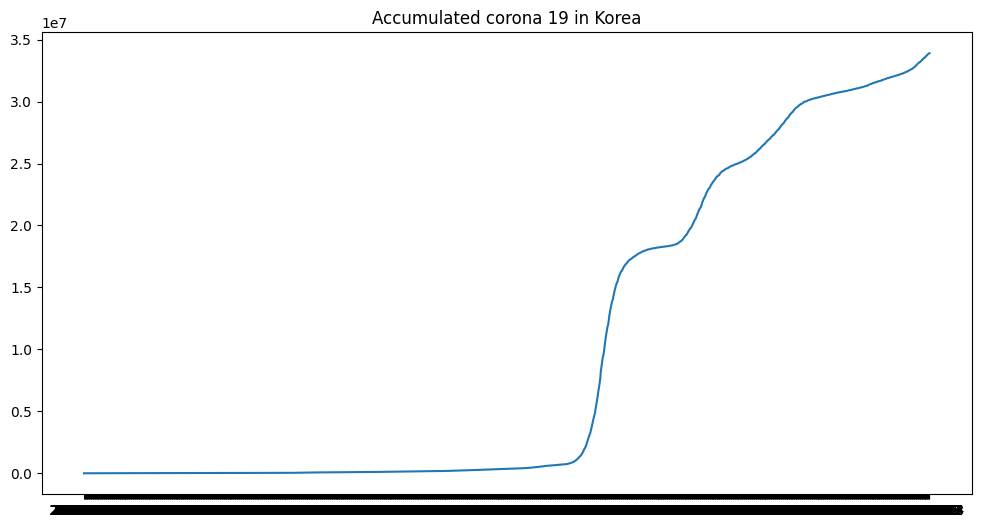

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(df['날짜'].astype(str), df['확진자'])
plt.title('Accumulated corona 19 in Korea')
plt.show()

### (2) 일간 코로나-19 확진자

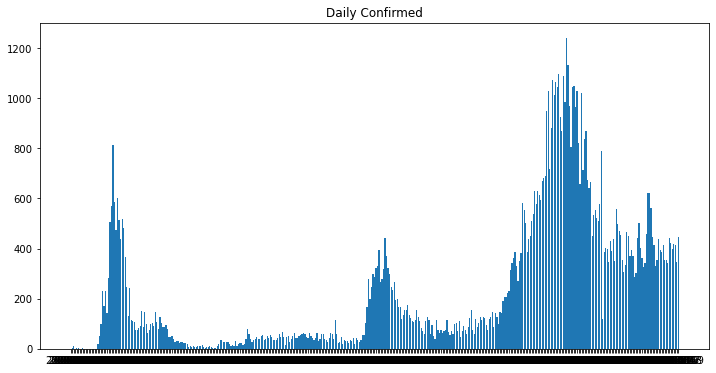

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(df['date'].astype(str), df['daily_confirmed'])
plt.title('Daily Confirmed')
plt.show()

# 2. Linear Regression 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## I. 누적확진자를 통한 예측
### (1) 이차함수로 선형회귀

In [ ]:
X = np.c_[range(len(df['date'])), np.square(np.array(range(len(df['date']))))]
X = X.reshape(-1, 2)
y_ = np.array(df['confirmed'])
y_ = y_.reshape(-1, 1)

print(X.shape, y_.shape)

len(pyrhon)

(403, 2) (403, 1)


In [ ]:
model = LinearRegression().fit(X, y_)
model.coef_, model.intercept_

(array([[-148.62949993,    0.85879928]]), array([11703.21257692]))

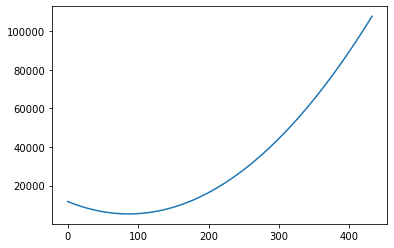

In [ ]:
pred_period = len(df['date']) + 30
predX = np.c_[range(pred_period), np.square(np.array(range(pred_period)))].reshape(-1, 2)
predY = model.predict(predX)

plt.plot(np.arange(pred_period), predY)

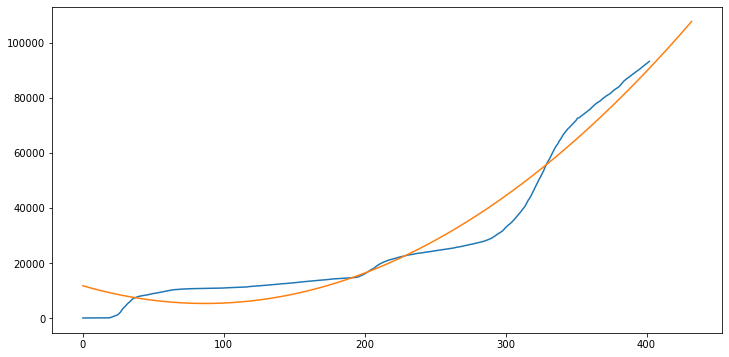

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(np.arange(len(df['date'])), df['confirmed'])
ax.plot(np.arange(pred_period), predY)
plt.show()

### (2) 지수함수로 선형회귀

In [ ]:
X = np.array(range(len(df['date']))).reshape(-1, 1)
y_ = np.array(np.log(df['confirmed'] + 0.0001)).reshape(-1, 1)

In [ ]:
model = LinearRegression().fit(X, y_)
model.coef_, model.intercept_

(array([[0.01171475]]), array([7.21372653]))

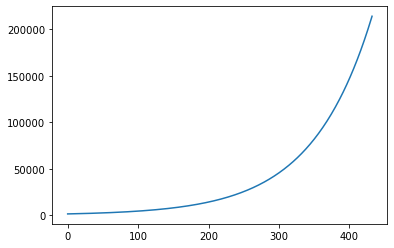

In [ ]:
pred_period = len(df['date']) + 30
predX = np.arange(pred_period).reshape(-1, 1)
predY = (np.exp(model.predict(predX)) - 0.0001).reshape(-1, 1)

plt.plot(predX, predY)

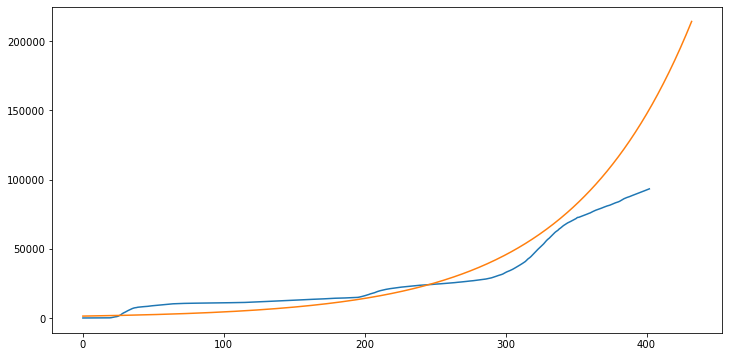

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(np.arange(len(df['date'])), df['confirmed'])
ax.plot(np.arange(pred_period), predY)
plt.show()

## II. 일간 확진자를 통한 예측
### (1) 이차함수로 선형회귀

In [ ]:
X = np.c_[range(len(df['date'])), np.square(np.array(range(len(df['date']))))]
X = X.reshape(-1, 2)
y_ = np.array(df['daily_confirmed'])
y_ = y_.reshape(-1, 1)

print(X.shape, y_.shape)

(403, 2) (403, 1)


In [ ]:
model = LinearRegression().fit(X, y_)
model.coef_, model.intercept_

(array([[-1.26201637,  0.00655789]]), array([131.3871723]))

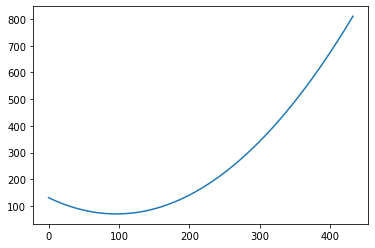

In [ ]:
pred_period = len(df['date']) + 30
predX = np.c_[range(pred_period), np.square(np.array(range(pred_period)))].reshape(-1, 2)
predY = model.predict(predX)

plt.plot(np.arange(pred_period), predY)

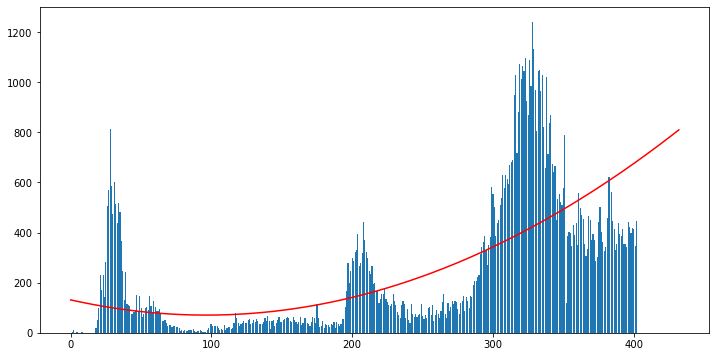

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(np.arange(len(df['date'])), df['daily_confirmed'])
ax.plot(np.arange(pred_period), predY, 'r')
plt.show()

### (2) 지수함수로 선형회귀

In [ ]:
X = np.array(range(len(df['date']))).reshape(-1, 1)
y_ = np.array(np.log(df['daily_confirmed'] + 0.0001)).reshape(-1, 1)

In [ ]:
model = LinearRegression().fit(X, y_)
model.coef_, model.intercept_

(array([[0.01198739]]), array([1.99224482]))

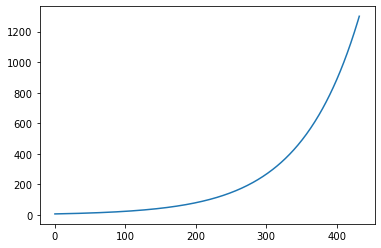

In [ ]:
pred_period = len(df['date']) + 30
predX = np.arange(pred_period).reshape(-1, 1)
predY = (np.exp(model.predict(predX)) - 0.0001).reshape(-1, 1)

plt.plot(predX, predY)

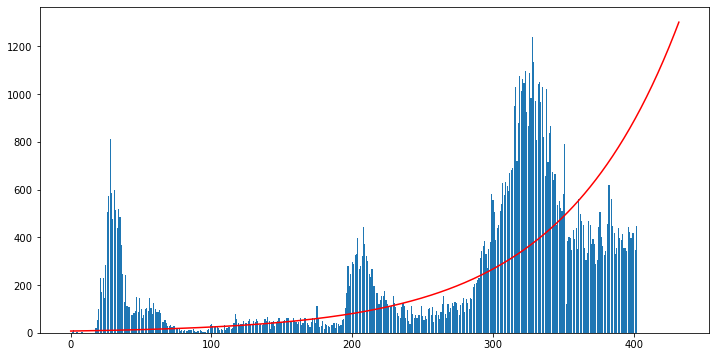

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.bar(np.arange(len(df['date'])), df['daily_confirmed'])
ax.plot(np.arange(pred_period), predY, 'r')
plt.show()